In [1]:
%load_ext autoreload
%autoreload 2 

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

from scipy.linalg import block_diag
from scipy.cluster.hierarchy import (
    linkage,
    fcluster,
    optimal_leaf_ordering,
    leaves_list,
    dendrogram
)
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets

from hrp import seriate
from debug import *


In [9]:
assets = pd.read_csv('assets.csv', index_col=0, parse_dates=True, dayfirst=True)
ret = assets.pct_change()

In [12]:
cov, corr = ret.cov(), ret.corr()

dist_corr = ((1 - ret.corr()) / 2) ** 0.5
flat_dist = squareform(dist_corr)
# dim = len(dist_corr)
# tri_a, tri_b = np.triu_indices(dim, k=1)
# flat_dist = dist_corr[tri_a, tri_b]  # this is same as squareform(dist_corr)

Z = linkage(flat_dist, method='ward')

<AxesSubplot:>

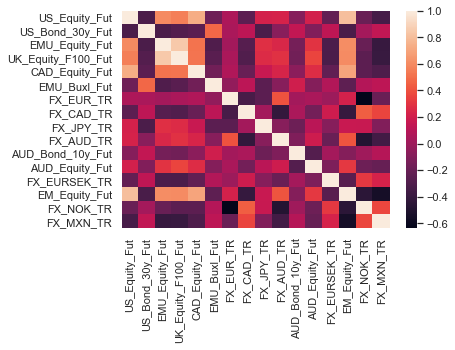

In [13]:
sns.heatmap(corr)

In [14]:
order = leaves_list(Z)

<AxesSubplot:>

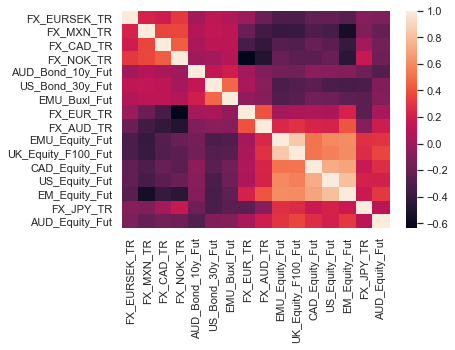

In [15]:
sns.heatmap(corr.iloc[order, order])

In [12]:
leaves_list(Z)

array([12,  4, 15, 19,  5, 13, 10,  6, 17,  3, 14,  2, 18,  0, 11,  9, 16,
        8,  1,  7], dtype=int32)

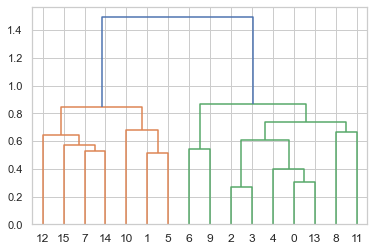

In [17]:
fig, ax = plt.subplots()
_ = dendrogram(Z, ax=ax)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
ac = AgglomerativeClustering(n_clusters=None, affinity='precomputed')

In [22]:
dist_corr.iloc[:, 0] - 

US_Equity_Fut         0.000000
US_Bond_30y_Fut       0.810680
EMU_Equity_Fut        0.446813
UK_Equity_F100_Fut    0.468237
CAD_Equity_Fut        0.365889
EMU_Buxl_Fut          0.765837
FX_EUR_TR             0.685783
FX_CAD_TR             0.788566
FX_JPY_TR             0.624753
FX_AUD_TR             0.621204
AUD_Bond_10y_Fut      0.735820
AUD_Equity_Fut        0.626977
FX_EURSEK_TR          0.781391
EM_Equity_Fut         0.305180
FX_NOK_TR             0.771891
FX_MXN_TR             0.816327
Name: US_Equity_Fut, dtype: float64

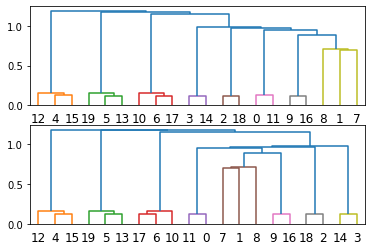

In [5]:
fig, axs = plt.subplots(nrows=2)
_ = dendrogram(Z, ax=axs[0])
# _ = dendrogram(optimal_leaf_ordering(Z, flat_dist), ax=axs[1])

NameError: name 'Z' is not defined

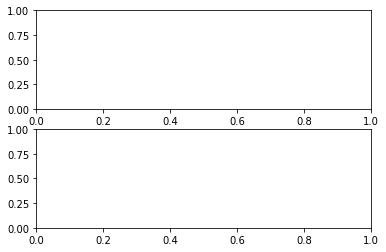

In [2]:
fcluster(Z, 3, criterion='maxclust')


n_clusters = 5
labels = fcluster(Z, n_clusters, criterion='maxclust')
# labels = fcluster(optimal_leaf_ordering(Z, flat_dist), self.n_clusters, criterion='maxclust')


def get_cluster_indices(labels):
    clusters = np.unique(labels)
    return {cluster: np.flatnonzero([labels == cluster]) for cluster in clusters}


clusters = get_cluster_indices(labels)

compute_allocation(Z, cov, clusters)
compute_allocation2(Z, cov, clusters)

In [23]:
import numpy as np
import random
r = np.array([random.randrange(1, 1000) for _ in range(0, 1000)])
dists = np.abs(r - r[:, None])

In [25]:
r.shape

(1000,)

In [30]:
r[:, None] - r

array([[   0,  933,  830, ...,  273,  698,  938],
       [-933,    0, -103, ..., -660, -235,    5],
       [-830,  103,    0, ..., -557, -132,  108],
       ...,
       [-273,  660,  557, ...,    0,  425,  665],
       [-698,  235,  132, ..., -425,    0,  240],
       [-938,   -5, -108, ..., -665, -240,    0]])

In [32]:
x = np.random.randint(30, size=(10, 7))

In [38]:
x[:, 1] - x.T 


array([[ -2,  24,  15,   0, -11,  -3, -13,  -9,  -8,  16],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,  22,  12, -10,  -7, -10, -18, -15,   7,   3],
       [  5,  16,   5,   2,  -9,  15, -19,   8,  14,   1],
       [  0,   2,   0,  -9,   4,  12, -14,  -5,  -8,  -8],
       [  3,  12,  10,   1,  -3,   8,   0,   4,  14,  14],
       [ 17,   2,  -9,   3, -20,  -5,  -2,   8,  -3,  -6]])

In [39]:
from scipy.spatial.distance import pdist
from scipy.spatial import distance_matrix

In [40]:
distance_matrix?

Signature: distance_matrix(x, y, p=2, threshold=1000000)
Docstring:
Compute the distance matrix.

Returns the matrix of all pair-wise distances.

Parameters
----------
x : (M, K) array_like
    Matrix of M vectors in K dimensions.
y : (N, K) array_like
    Matrix of N vectors in K dimensions.
p : float, 1 <= p <= infinity
    Which Minkowski p-norm to use.
threshold : positive int
    If ``M * N * K`` > `threshold`, algorithm uses a Python loop instead
    of large temporary arrays.

Returns
-------
result : (M, N) ndarray
    Matrix containing the distance from every vector in `x` to every vector
    in `y`.

Examples
--------
>>> from scipy.spatial import distance_matrix
>>> distance_matrix([[0,0],[0,1]], [[1,0],[1,1]])
array([[ 1.        ,  1.41421356],
       [ 1.41421356,  1.        ]])
File:      c:\dev\projects\base\venv\lib\site-packages\scipy\spatial\kdtree.py
Type:      function


In [42]:
pdist?

Signature: pdist(X, metric='euclidean', *args, **kwargs)
Docstring:
Pairwise distances between observations in n-dimensional space.

See Notes for common calling conventions.

Parameters
----------
X : ndarray
    An m by n array of m original observations in an
    n-dimensional space.
metric : str or function, optional
    The distance metric to use. The distance function can
    be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
    'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
*args : tuple. Deprecated.
    Additional arguments should be passed as keyword arguments
**kwargs : dict, optional
    Extra arguments to `metric`: refer to each metric documentation for a
    list of all possible arguments.

    Some possible arguments:

    p : scalar
    The p-norm to apply for Minko

In [44]:
npd = dist_corr.to_numpy()

In [66]:
pd.DataFrame(data=[(((npd[:, i:i+1] - npd) ** 2).sum(axis=0)) for i in range(len(npd))], index=dist_corr.index, columns=dist_corr.columns) ** 0.5

US_Equity_Fut  US_Bond_30y_Fut  EMU_Equity_Fut  \
US_Equity_Fut            0.000000         1.480420        0.690091   
US_Bond_30y_Fut          1.480420         0.000000        1.489798   
EMU_Equity_Fut           0.690091         1.489798        0.000000   
UK_Equity_F100_Fut       0.714795         1.477923        0.388147   
CAD_Equity_Fut           0.528060         1.421176        0.737506   
EMU_Buxl_Fut             1.418183         0.726829        1.456408   
FX_EUR_TR                1.154273         1.099389        1.176364   
FX_CAD_TR                1.482810         0.988544        1.493455   
FX_JPY_TR                1.036016         1.268601        0.996224   
FX_AUD_TR                0.992661         1.221858        0.990806   
AUD_Bond_10y_Fut         1.318171         0.947388        1.349815   
AUD_Equity_Fut           0.982163         1.213710        0.935158   
FX_EURSEK_TR             1.436370         0.957459        1.464077   
EM_Equity_Fut            0.461801         1.519903        0.683131   
FX_NOK_TR                1.483511         1.061266        1.484655   
FX_MXN_TR                1.544734         0.969837        1.561822   

                    UK_Equity_F100_Fut  CAD_Equity_Fut  EMU_Buxl_Fut  \
US_Equity_Fut                 0.714795        0.528060      1.418183   
US_Bond_30y_Fut               1.477923        1.421176      0.726829   
EMU_Equity_Fut                0.388147        0.737506      1.456408   
UK_Equity_F100_Fut            0.000000        0.738963      1.446393   
CAD_Equity_Fut                0.738963        0.000000      1.369177   
EMU_Buxl_Fut                  1.446393        1.369177      0.000000   
FX_EUR_TR                     1.160836        1.109863      1.125818   
FX_CAD_TR                     1.499026        1.431394      0.985544   
FX_JPY_TR                     1.006390        1.026354      1.230518   
FX_AUD_TR                     0.965777        0.960107      1.210665   
AUD_Bond_10y_Fut              1.351912        1.271517      0.912993   
AUD_Equity_Fut                0.906232        0.928582      1.190844   
FX_EURSEK_TR                  1.465055        1.394332      0.978341   
EM_Equity_Fut                 0.687164        0.577102      1.472216   
FX_NOK_TR                     1.497133        1.453324      1.032231   
FX_MXN_TR                     1.561814        1.493138      0.977247   

                    FX_EUR_TR  FX_CAD_TR  FX_JPY_TR  FX_AUD_TR  \
US_Equity_Fut        1.154273   1.482810   1.036016   0.992661   
US_Bond_30y_Fut      1.099389   0.988544   1.268601   1.221858   
EMU_Equity_Fut       1.176364   1.493455   0.996224   0.990806   
UK_Equity_F100_Fut   1.160836   1.499026   1.006390   0.965777   
CAD_Equity_Fut       1.109863   1.431394   1.026354   0.960107   
EMU_Buxl_Fut         1.125818   0.985544   1.230518   1.210665   
FX_EUR_TR            0.000000   1.308963   1.191760   0.802881   
FX_CAD_TR            1.308963   0.000000   1.121070   1.391247   
FX_JPY_TR            1.191760   1.121070   0.000000   1.111498   
FX_AUD_TR            0.802881   1.391247   1.111498   0.000000   
AUD_Bond_10y_Fut     1.063581   1.018524   1.160388   1.170271   
AUD_Equity_Fut       1.023710   1.256050   0.970117   0.926045   
FX_EURSEK_TR         1.139063   0.914115   1.148950   1.267167   
EM_Equity_Fut        1.099780   1.574267   1.098677   0.908115   
FX_NOK_TR            1.413904   0.754704   1.067949   1.435176   
FX_MXN_TR            1.269664   0.806424   1.200527   1.388052   

                    AUD_Bond_10y_Fut  AUD_Equity_Fut  FX_EURSEK_TR  \
US_Equity_Fut               1.318171        0.982163      1.436370   
US_Bond_30y_Fut             0.947388        1.213710      0.957459   
EMU_Equity_Fut              1.349815        0.935158      1.464077   
UK_Equity_F100_Fut          1.351912        0.906232      1.465055   
CAD_Equity_Fut              1.271517        0.928582      1.394332   
EMU_Buxl_Fut                0.912993        1.190844      0.9

In [68]:
pd.DataFrame(data=squareform(pdist(dist_corr.to_numpy())), index=dist_corr.index, columns=dist_corr.columns)

US_Equity_Fut  US_Bond_30y_Fut  EMU_Equity_Fut  \
US_Equity_Fut            0.000000         1.480420        0.690091   
US_Bond_30y_Fut          1.480420         0.000000        1.489798   
EMU_Equity_Fut           0.690091         1.489798        0.000000   
UK_Equity_F100_Fut       0.714795         1.477923        0.388147   
CAD_Equity_Fut           0.528060         1.421176        0.737506   
EMU_Buxl_Fut             1.418183         0.726829        1.456408   
FX_EUR_TR                1.154273         1.099389        1.176364   
FX_CAD_TR                1.482810         0.988544        1.493455   
FX_JPY_TR                1.036016         1.268601        0.996224   
FX_AUD_TR                0.992661         1.221858        0.990806   
AUD_Bond_10y_Fut         1.318171         0.947388        1.349815   
AUD_Equity_Fut           0.982163         1.213710        0.935158   
FX_EURSEK_TR             1.436370         0.957459        1.464077   
EM_Equity_Fut            0.461801         1.519903        0.683131   
FX_NOK_TR                1.483511         1.061266        1.484655   
FX_MXN_TR                1.544734         0.969837        1.561822   

                    UK_Equity_F100_Fut  CAD_Equity_Fut  EMU_Buxl_Fut  \
US_Equity_Fut                 0.714795        0.528060      1.418183   
US_Bond_30y_Fut               1.477923        1.421176      0.726829   
EMU_Equity_Fut                0.388147        0.737506      1.456408   
UK_Equity_F100_Fut            0.000000        0.738963      1.446393   
CAD_Equity_Fut                0.738963        0.000000      1.369177   
EMU_Buxl_Fut                  1.446393        1.369177      0.000000   
FX_EUR_TR                     1.160836        1.109863      1.125818   
FX_CAD_TR                     1.499026        1.431394      0.985544   
FX_JPY_TR                     1.006390        1.026354      1.230518   
FX_AUD_TR                     0.965777        0.960107      1.210665   
AUD_Bond_10y_Fut              1.351912        1.271517      0.912993   
AUD_Equity_Fut                0.906232        0.928582      1.190844   
FX_EURSEK_TR                  1.465055        1.394332      0.978341   
EM_Equity_Fut                 0.687164        0.577102      1.472216   
FX_NOK_TR                     1.497133        1.453324      1.032231   
FX_MXN_TR                     1.561814        1.493138      0.977247   

                    FX_EUR_TR  FX_CAD_TR  FX_JPY_TR  FX_AUD_TR  \
US_Equity_Fut        1.154273   1.482810   1.036016   0.992661   
US_Bond_30y_Fut      1.099389   0.988544   1.268601   1.221858   
EMU_Equity_Fut       1.176364   1.493455   0.996224   0.990806   
UK_Equity_F100_Fut   1.160836   1.499026   1.006390   0.965777   
CAD_Equity_Fut       1.109863   1.431394   1.026354   0.960107   
EMU_Buxl_Fut         1.125818   0.985544   1.230518   1.210665   
FX_EUR_TR            0.000000   1.308963   1.191760   0.802881   
FX_CAD_TR            1.308963   0.000000   1.121070   1.391247   
FX_JPY_TR            1.191760   1.121070   0.000000   1.111498   
FX_AUD_TR            0.802881   1.391247   1.111498   0.000000   
AUD_Bond_10y_Fut     1.063581   1.018524   1.160388   1.170271   
AUD_Equity_Fut       1.023710   1.256050   0.970117   0.926045   
FX_EURSEK_TR         1.139063   0.914115   1.148950   1.267167   
EM_Equity_Fut        1.099780   1.574267   1.098677   0.908115   
FX_NOK_TR            1.413904   0.754704   1.067949   1.435176   
FX_MXN_TR            1.269664   0.806424   1.200527   1.388052   

                    AUD_Bond_10y_Fut  AUD_Equity_Fut  FX_EURSEK_TR  \
US_Equity_Fut               1.318171        0.982163      1.436370   
US_Bond_30y_Fut             0.947388        1.213710      0.957459   
EMU_Equity_Fut              1.349815        0.935158      1.464077   
UK_Equity_F100_Fut          1.351912        0.906232      1.465055   
CAD_Equity_Fut              1.271517        0.928582      1.394332   
EMU_Buxl_Fut                0.912993        1.190844      0.9